### Why Transformation/Scaling of feature is required?

1) Linear Regression----Gradient Descent--------Global Minima
2) KNN, or other clustering algo----------------Use eucledian distance 


Suppose you have feature like this
p1- (20,56)
p2- (22,78)

so now these number differece is huge so we for saving the time for calculation we use the transformation technique.

we need to transform these value in a scale.

Qus-  Do we require scaling for all machine learning models?
No, we don't require it for decision tree/random forest
or we can say where ml model need to perform some calculation then scaling is required.


In Deep Learning we require scaling for all task(ANN, CNN, RNN)


### Types of transformation---------
1) Normalization and Standardization

2) Scaling to minimum and maximum values

3) Scaling to median and quantiles

4) Guassian TransformationL:
    
    a) Logarithmetic transformation
    b) Reciprocal Transformation
    c) Square root transformation
    d) Exponential Transformation
    e) Box Cox Transformation





In [1]:
import numpy as np
import pandas as pd

In [2]:
#If you want to do some kine of plotting

import matplotlib.pyplot as plt
%matplotlib inline

## 1 Tech- Standardization :

We try to bring all the variables or features to a similar scale.
Standardization means centering the variable at zero(zero is considerd as your mean).

Formula-----  
z=(x-x_mean)/std()




In [16]:
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [18]:
# Can use any technique that we learn previously

df.Age.fillna(df.Age.median(), inplace=True)

In [19]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [21]:
## Standardization- We use Standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler

In [22]:
scaler= StandardScaler()

df_scaled= scaler.fit_transform(df)

In [ ]:
## Diff between fit and fit_transform
When you apply ml algo then we use fit and when we also need to transforming our data then it comes under fit_transform

In [23]:
# It's converted in array so we need to convert it into dataframe
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [35]:
df_scaled= pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [25]:
# How you are gettin this?
#As discuss formula is : (x-x_mean)/std

df.head()
    


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [27]:
x_mean= df.Age.mean()
x_std= df.Age.std()

print(x_mean, x_std)

29.36158249158249 13.019696550973201


In [28]:
print((22-x_mean)/x_std)

# So these both are same in df and df_scaled

-0.5654188991856514


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

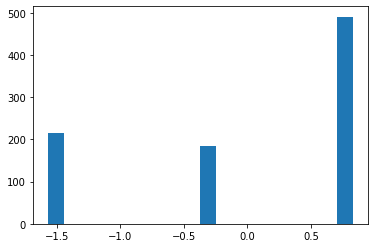

In [40]:
# For pclass
plt.hist(df_scaled[1], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

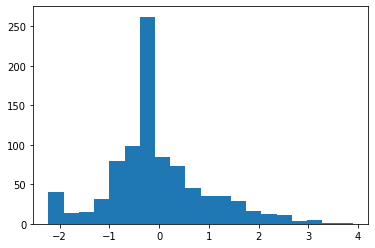

In [42]:
# For Age- as we change by mean so mostly value will be in between

# Data is scaled down between -2 to 4

plt.hist(df_scaled[2], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

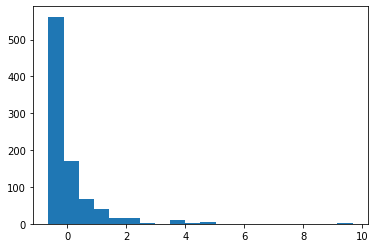

In [43]:
# For Fare
# There are alot of outliers

plt.hist(df_scaled[3], bins=20)


This above is right skewed 

In [46]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


## 2 Tech - Min Max Scaling

### Popularly use in CNN and widely use in deep learning

#### But in ml people usually use standardization

Min-Max scaling transform the value between 0 to 1

Formula=   (x-x_min)/(x_max-x_min)


If you have data of standard normal distribution then use standard scalar.
If not then use min-max scaler
most of the we will use standard scaler
But for cnn(deep learning algo) we should use min-max scaler(for picture data)

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler()

df_minmax=pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

In [52]:
df_minmax.head()

# Servived is not changes bcoz it's already in 0 and 1 format

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

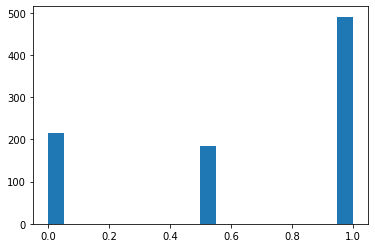

In [57]:
plt.hist(df_minmax['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

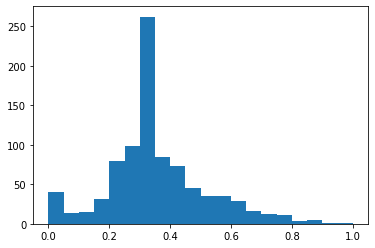

In [58]:
plt.hist(df_minmax['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

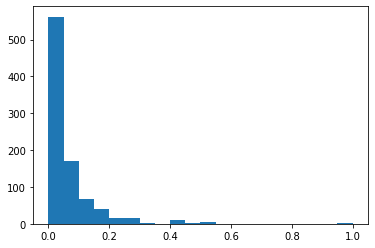

In [59]:
plt.hist(df_minmax['Fare'], bins=20)

## 3rd Tech- Robust Scaler

It's used to scale the feature to median and quantiles
We find the interquantile range.
Mostly use when we have more outliers in our data


**Formula-   (x-x.median)/IQR**

Where IQR is 75th Quantile- 25th Quantile

In [61]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


#### Exp for Quantile

0,1,2,3,4,5,6,7,8,9,10

9 -- 90 percentile(bcoz 90% of values is less than 9)
1 -- 10 percentile(bcoz 10% of values is less than 1)

In [60]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [63]:
df_Robust_Scaler= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_Robust_Scaler.head(7)

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
5,0.0,0.0,0.000000,-0.259680
6,0.0,-2.0,2.000000,1.620136


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

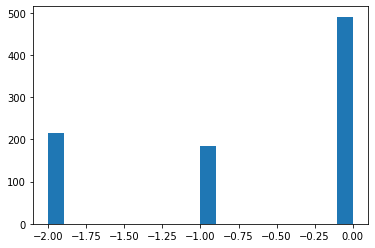

In [64]:
plt.hist(df_Robust_Scaler['Pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

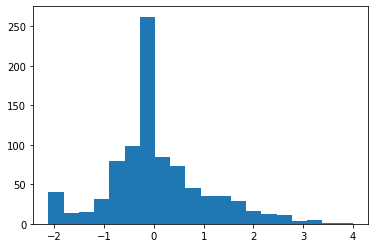

In [65]:
plt.hist(df_Robust_Scaler['Age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

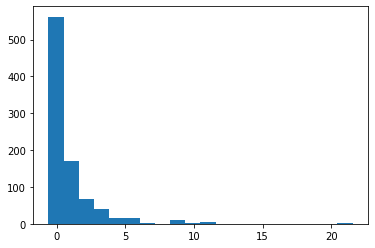

In [66]:
plt.hist(df_Robust_Scaler['Fare'], bins=20)

## 4th Tech-- Guassian Transformation:
    
    a) Logarithmetic transformation
    b) Reciprocal Transformation
    c) Square root transformation
    d) Exponential Transformation
    e) Box Cox Transformation


Gausian distribution means Normal Distribution

If we can see from all above graphs Age,Pclass are normally distributed but **Fare** is righly skewed so we have multiple technique to transform this into Normal Distribution.

In simple word--- Actually we have data-features of two type one is Normal Distribute and anothe one is Right/Left Distributed
So for Normal distribution we use Stand, min_max, Robust scaling technique
But when it comes to Left/Right skewed distribution we need Gusaaian Transformation technique


For this we have Guassian transformation and there we have technique-

### 4.1-- Logarithmetic Transformation

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.Age.fillna(df['Age'].median(), inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

We want to see is it gussian distributed or not?

**If you want to check feature is normal/gaussian distributed or not?--- For this we use Q-Q Plot**



In [9]:
# For Q-Q Plot

import scipy.stats as stat
import pylab

In [16]:
def plot_data(df, feature):
    plt.figure(figsize=(8,6))
    
    plt.subplot(1,2,1)
    df[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot= pylab)
    # We wants to check all the point are follows a line or not
    plt.show()

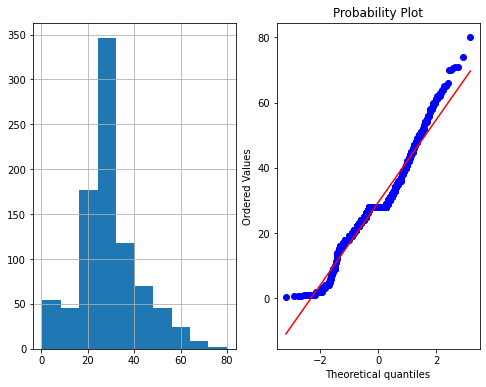

In [11]:
# So we can see it's already gausian/normally distributed

plot_data(df,'Age')

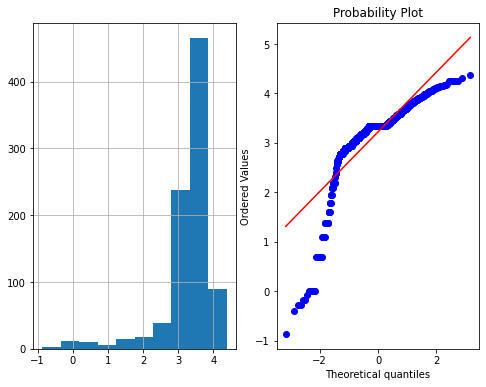

In [13]:
## Logarithmentic Distribution
# It's work well when your data is rightly/left skewed

#Let's try this on our Age Variable

df['Age_log']= np.log(df['Age'])
plot_data(df,'Age_log')

In [23]:
df.head()

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348


### 2nd tech- Reciprocal Transformation

It's only reverse

In [25]:
df['Age_reciprocal']= 1/df.Age
df.head()

,Survived,Age,Fare,Age_log,Age_reciprocal
0,0,22.0,7.2500,3.091042,0.045455
1,1,38.0,71.2833,3.637586,0.026316
2,1,26.0,7.9250,3.258097,0.038462
3,1,35.0,53.1000,3.555348,0.028571
4,0,35.0,8.0500,3.555348,0.028571


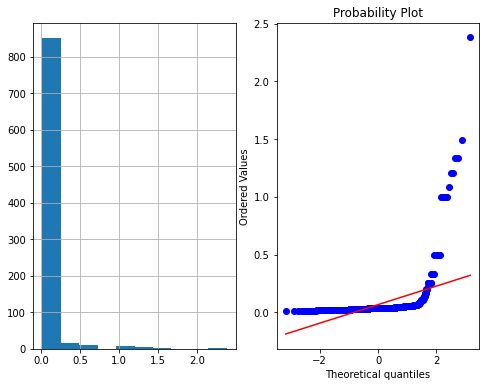

In [26]:
plot_data(df,'Age_reciprocal')

# Now good for this data

### 3rd tech- Square root transformation

Just finding by root

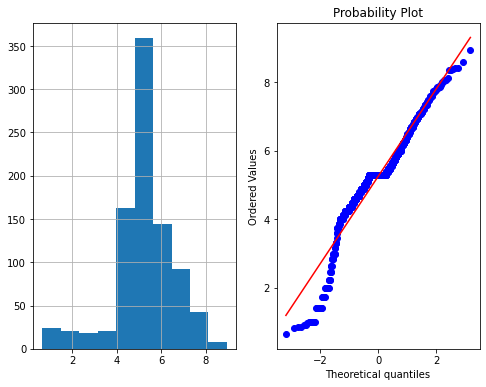

In [31]:
df['Age_Square']= df.Age**(1/2)
plot_data(df, 'Age_Square')

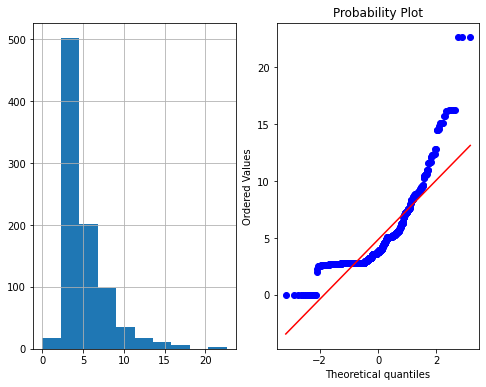

In [39]:
# For Fare


df['Fare_Square']= df.Fare**(1/2)
plot_data(df, 'Fare_Square')

### Exponential Transformation

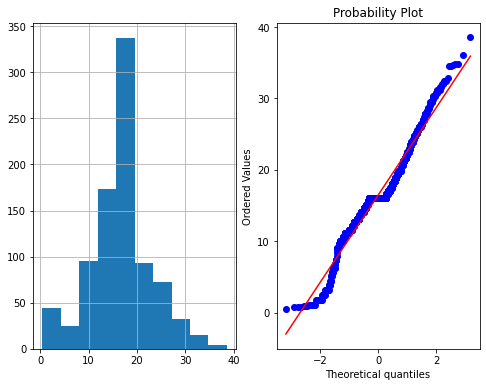

In [30]:


df['Age_exponential']= df.Age**(1/1.2)
plot_data(df, 'Age_exponential')

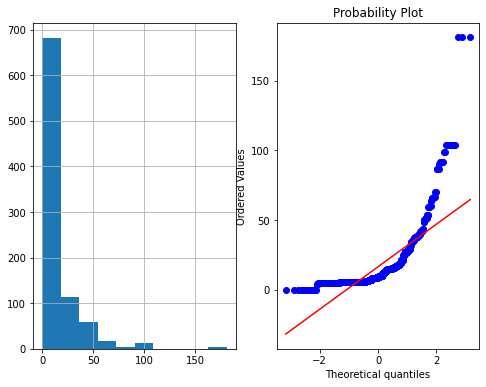

In [38]:
#Fare

df['Fare_exponential']= df.Fare**(1/1.2)
plot_data(df, 'Fare_exponential')

### BoxCox Transformation

The box cox transformation is defined as :

T(Y)= (Y exp(lambda)-1 )/lambda

Where Y is Age Variable and lambda is transformation parameter. Lambda varies from -5 to 5.
In the transformation all values of lambda are considered and the optimal value for a given variable is seleced.

In [40]:
df['Age_Boxcox'], parameters =stat.boxcox(df.Age)

In [41]:
df.head()

,Survived,Age,Fare,Age_log,Age_reciprocal,Age_Square,Age_exponential,Age_Boxcox,Fare_exponential,Fare_Square
0,0,22.0,7.2500,3.091042,0.045455,4.690416,13.142729,13.468119,5.211327,2.692582
1,1,38.0,71.2833,3.637586,0.026316,6.164414,20.724608,21.498728,35.007129,8.442944
2,1,26.0,7.9250,3.258097,0.038462,5.099020,15.105825,15.563417,5.612625,2.815138
3,1,35.0,53.1000,3.555348,0.028571,5.916080,19.351889,20.056110,27.389163,7.286975
4,0,35.0,8.0500,3.555348,0.028571,5.916080,19.351889,20.056110,5.686302,2.837252


In [37]:
parameters

0.7964531473656952

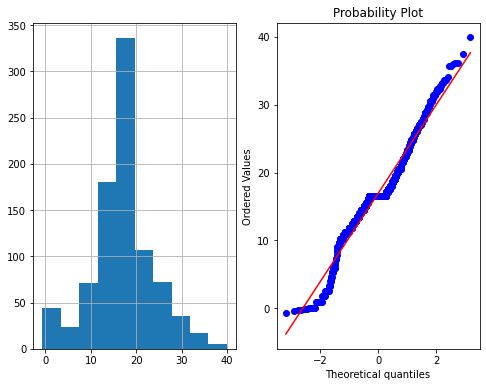

In [42]:
plot_data(df,'Age_Boxcox')

In [47]:
df.head(3)

,Survived,Age,Fare,Age_log,Age_reciprocal,Age_Square,Age_exponential,Age_Boxcox,Fare_exponential,Fare_Square,Fare_Boxcox,Fare_log
0,0,22.0,7.2500,3.091042,0.045455,4.690416,13.142729,13.468119,5.211327,2.692582,5.211327,2.110213
1,1,38.0,71.2833,3.637586,0.026316,6.164414,20.724608,21.498728,35.007129,8.442944,35.007129,4.280593
2,1,26.0,7.9250,3.258097,0.038462,5.099020,15.105825,15.563417,5.612625,2.815138,5.612625,2.188856


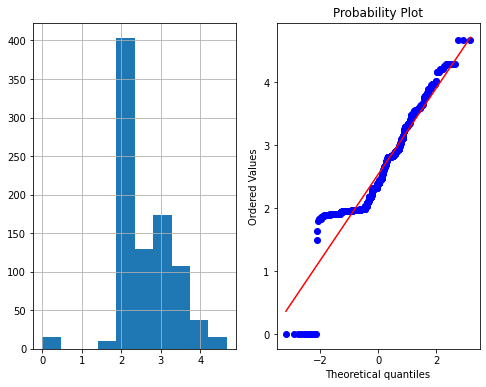

In [49]:
#For Fare

# It requires only positive value so we add 1

# That's also working good

df['Fare_Boxcox'], parameters =stat.boxcox(df.Fare + 1)
plot_data(df, 'Fare_Boxcox')

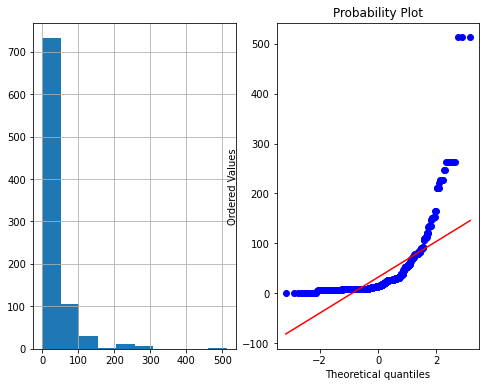

In [24]:
# Now checking for Fare
plot_data(df, 'Fare')

# As we can see it's not gaussian distributed. It's right skewed

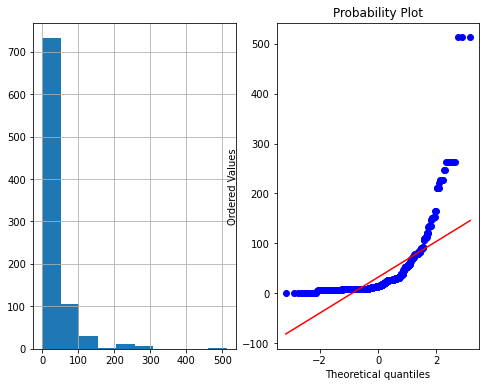

In [12]:
# Now we can see it's not gaussian distributed

plot_data(df,'Fare')

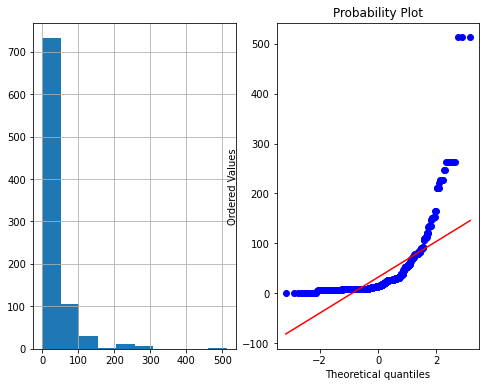

In [46]:
plot_data(df, 'Fare')

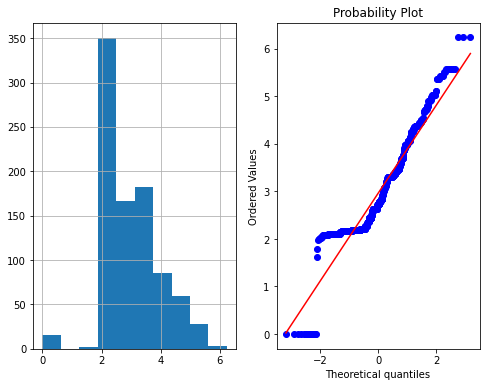

In [45]:
# when we doing logarithmetic for fare gives error bcoz it have zero values

# That really works well for Fare Feature

df['Fare_log']= np.log1p(df.Fare)
plot_data(df, 'Fare_log')
